<AxesSubplot:>

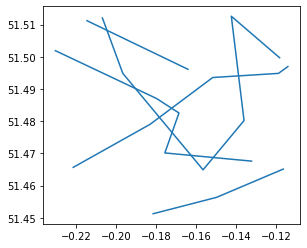

In [27]:
import geopandas as gpd

gdf = gpd.read_file('selfintersects.geojson')
gdf.plot()

<AxesSubplot:>

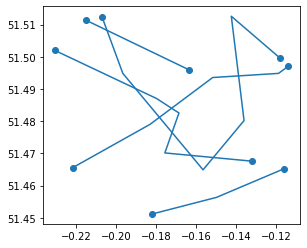

In [32]:
def get_endpoints(gdf):
    from shapely.geometry import Point
    startpoint = gdf.geometry.apply(lambda x: x.coords[0])
    endpoint = gdf.geometry.apply(lambda x: x.coords[-1])

    startpoints = [Point(i) for i in startpoint]
    endpoints = [Point(i) for i in endpoint]

    return startpoints, endpoints

def create_endpoints(startpoints, endpoints):
    geom = []
    for a,b in zip(startpoints, endpoints):
        from shapely.geometry import Point
        geom.append(a)
        geom.append(b)

    endpoints = gpd.GeoDataFrame({'id': range(0, len(geom))}, crs=gdf.crs, geometry=geom)
    return endpoints

startpoints, endpoints = get_endpoints(gdf)
endpoints = create_endpoints(startpoints, endpoints)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gdf.plot(ax=ax)
endpoints.plot(ax=ax)

<AxesSubplot:>

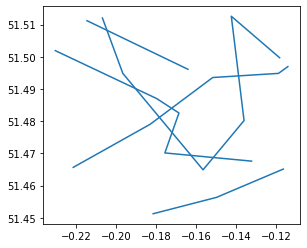

In [29]:
union_geom = gdf.unary_union
union = gpd.GeoDataFrame({'id':[0]}, crs=gdf.crs, geometry=[gdf.unary_union])
union.plot()

C:\Users\SutanMufti\AppData\Local\Temp\ipykernel_31876\1472115873.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  lm = gpd.GeoDataFrame({'id':[0]}, crs=gdf.crs, geometry=[linemerge(union_geom)]).explode().reset_index(drop=True)


<AxesSubplot:>

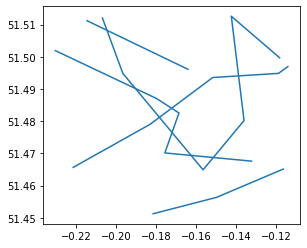

In [30]:
from shapely.ops import linemerge

lm = gpd.GeoDataFrame({'id':[0]}, crs=gdf.crs, geometry=[linemerge(union_geom)]).explode().reset_index(drop=True)
lm.plot()

<AxesSubplot:>

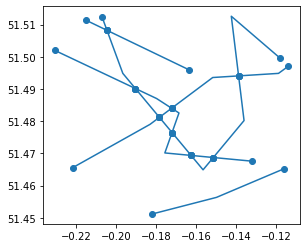

In [53]:
startpoints, endpoints = get_endpoints(lm)
endpoints = create_endpoints(startpoints, endpoints)

# cleansing with snap
from shapely.ops import snap
endpoints['geometry'] = endpoints.geometry.apply(lambda x: snap(x, union_geom, 0.00001))

fig, ax = plt.subplots()
gdf.plot(ax=ax)
endpoints.plot(ax=ax)

<AxesSubplot:>

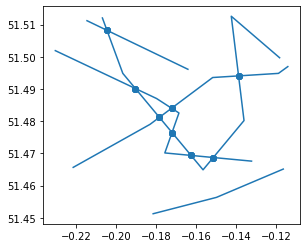

In [63]:
sjoin = endpoints.sjoin(gdf, how='left')

fig, ax = plt.subplots()
gdf.plot(ax=ax)
sjoin[sjoin['index_right'].isna()].plot(ax=ax)

In [66]:
sjoin

,id,geometry,index_right
0,0,POINT (-0.23054 51.50201),2.0
1,1,POINT (-0.19028 51.49015),NaN
2,2,POINT (-0.22161 51.46556),1.0
3,3,POINT (-0.17832 51.48120),NaN
4,4,POINT (-0.21475 51.51131),4.0
5,5,POINT (-0.20446 51.50822),NaN
6,6,POINT (-0.20685 51.51227),0.0
7,7,POINT (-0.20446 51.50822),NaN
8,8,POINT (-0.20446 51.50822),NaN
9,9,POINT (-0.19028 51.49015),NaN
